# Objective
To identify which ad platform is more effective in terms of conversions, clicks and overall cost-effectiveness?
Then, performing regression analysis for the best campaign to predict the conversion accoring to clicks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
ab=pd.read_csv("campaign.csv")

In [3]:
ab

,date_of_campaign,facebook_ad_campaign,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_campaign,adword_ad_views,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click
0,2021-12-22,FACEBOOK AD,3172,62,16,141,1.95,22.58,2.27,ADWORD AD,5754,64,11,177,1.11,14.06,2.77
1,2021-12-24,FACEBOOK AD,3211,38,9,186,1.18,23.68,4.89,ADWORD AD,4954,73,10,54,1.47,8.22,0.74
2,2021-12-25,FACEBOOK AD,1936,53,15,66,2.74,28.30,1.25,ADWORD AD,4702,38,4,187,0.81,23.68,4.92
3,2021-12-25,FACEBOOK AD,1194,45,14,71,3.77,20.00,1.58,ADWORD AD,3718,58,4,161,1.56,5.17,2.78
4,2021-12-26,FACEBOOK AD,2479,44,11,174,1.77,27.27,3.95,ADWORD AD,5562,63,8,162,1.13,6.35,2.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2024-12-17,FACEBOOK AD,1154,56,13,161,4.85,14.29,2.88,ADWORD AD,4275,73,11,54,1.71,4.11,0.74
996,2024-12-18,FACEBOOK AD,1108,58,18,198,5.23,22.41,3.41,ADWORD AD,4749,55,5,116,1.16,9.09,2.11
997,2024-12-18,FACEBOOK AD,1866,70,19,97,3.75,27.14,1.39,ADWORD AD,4582,36,1,149,0.79,11.11,4.14
998,2024-12-20,FACEBOOK AD,1279,59,14,171,4.61,32.20,2.90,ADWORD AD,4877,66,6,65,1.35,9.09,0.98


# Metadata:
Description: This dataset captures daily performance metrics from both Facebook and Google AdWords advertising campaigns, including views, clicks, conversions, and cost-related KPIs over a multi-year period.

Time Period: 2021-12-22 to 2024-12-20

| Column Name                  | Data Type | Description                                                                 |
|-----------------------------|-----------|-----------------------------------------------------------------------------|
| `date_of_campaign`          | datetime  | The date on which the ad performance data was recorded.                    |
| `facebook_ad_campaign`      | string    | Label for Facebook ad campaigns (constant: "FACEBOOK AD").                 |
| `facebook_ad_views`         | int       | Total number of impressions (views) of Facebook ads.                       |
| `facebook_ad_clicks`        | int       | Number of clicks received on Facebook ads.                                 |
| `facebook_ad_conversions`   | int       | Number of successful conversions (e.g., sign-ups, purchases) from Facebook ads. |
| `facebook_cost_per_ad`      | float     | Total cost incurred for Facebook ad impressions for the day.               |
| `facebook_ctr`              | float     | Click-through rate (%) for Facebook ads. Calculated as (clicks / views) * 100. |
| `facebook_conversion_rate`  | float     | Conversion rate (%) for Facebook ads. Calculated as (conversions / clicks) * 100. |
| `facebook_cost_per_click`   | float     | Average cost per click (CPC) on Facebook ads.                              |
| `adword_ad_campaign`        | string    | Label for Google AdWords campaigns (constant: "ADWORD AD").                |
| `adword_ad_views`           | int       | Total number of impressions (views) of AdWords ads.                        |
| `adword_ad_clicks`          | int       | Number of clicks received on AdWords ads.                                  |
| `adword_ad_conversions`     | int       | Number of successful conversions from AdWords ads.                         |
| `adword_cost_per_ad`        | float     | Total cost incurred for AdWords ad impressions for the day.                |
| `adword_ctr`                | float     | Click-through rate (%) for AdWords ads.                                    |
| `adword_conversion_rate`    | float     | Conversion rate (%) for AdWords ads.                                       |
| `adword_cost_per_click`     | float     | Average cost per click (CPC) on AdWords ads.                               |


In [4]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date_of_campaign          1000 non-null   object 
 1   facebook_ad_campaign      1000 non-null   object 
 2   facebook_ad_views         1000 non-null   int64  
 3   facebook_ad_clicks        1000 non-null   int64  
 4   facebook_ad_conversions   1000 non-null   int64  
 5   facebook_cost_per_ad      1000 non-null   int64  
 6   facebook_ctr              1000 non-null   float64
 7   facebook_conversion_rate  1000 non-null   float64
 8   facebook_cost_per_click   1000 non-null   float64
 9   adword_ad_campaign        1000 non-null   object 
 10  adword_ad_views           1000 non-null   int64  
 11  adword_ad_clicks          1000 non-null   int64  
 12  adword_ad_conversions     1000 non-null   int64  
 13  adword_cost_per_ad        1000 non-null   int64  
 14  adword_ct

In [5]:
# Statitics for numeri variables
ab.describe()

,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_views,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2152.031000,44.196000,11.100000,156.610000,2.28316,32.696080,4.310500,4771.438000,60.128000,6.324000,124.741000,1.280950,10.807510,2.265540
std,661.982166,16.833328,4.583995,54.918904,1.20670,20.570796,2.751582,598.647684,17.047822,3.289353,43.809053,0.402492,5.205133,1.101846
min,1050.000000,15.000000,1.000000,60.000000,0.49000,6.850000,0.960000,3715.000000,31.000000,1.000000,50.000000,0.540000,3.370000,0.580000
25%,1600.250000,30.000000,7.000000,110.000000,1.36750,18.052500,2.337500,4258.250000,45.000000,4.000000,86.000000,0.940000,6.970000,1.470000
50%,2123.500000,44.500000,11.000000,156.000000,2.07000,27.120000,3.600000,4808.500000,60.000000,6.000000,124.000000,1.260000,9.720000,2.030000
75%,2706.250000,58.000000,15.000000,205.000000,2.92250,41.880000,5.610000,5300.750000,75.000000,9.000000,163.000000,1.570000,13.485000,2.802500
max,3320.000000,73.000000,22.000000,250.000000,6.86000,118.750000,16.530000,5754.000000,89.000000,18.000000,200.000000,2.370000,29.030000,6.190000


In [6]:
# Statitics for categorical variables
ab.describe(include="O")

,date_of_campaign,facebook_ad_campaign,adword_ad_campaign
count,1000,1000,1000
unique,658,1,1
top,2024-01-18,FACEBOOK AD,ADWORD AD
freq,6,1000,1000


In [7]:
# Checking for null values
ab.isnull().sum()

date_of_campaign            0
facebook_ad_campaign        0
facebook_ad_views           0
facebook_ad_clicks          0
facebook_ad_conversions     0
facebook_cost_per_ad        0
facebook_ctr                0
facebook_conversion_rate    0
facebook_cost_per_click     0
adword_ad_campaign          0
adword_ad_views             0
adword_ad_clicks            0
adword_ad_conversions       0
adword_cost_per_ad          0
adword_ctr                  0
adword_conversion_rate      0
adword_cost_per_click       0
dtype: int64

In [8]:
ab.shape

(1000, 17)

In [9]:
ab['date_of_campaign']=pd.to_datetime(ab['date_of_campaign'])
ab['day_of_campaign'] = ab['date_of_campaign'].dt.day_name()
ab['week_of_campaign']=ab['date_of_campaign'].dt.isocalendar().week
ab['month_of_campaign']=ab['date_of_campaign'].dt.month_name()
ab['year_of_campaign'] = ab['date_of_campaign'].dt.year

In [10]:
ab

,date_of_campaign,facebook_ad_campaign,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_campaign,...,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click,day_of_campaign,week_of_campaign,month_of_campaign,year_of_campaign
0,2021-12-22,FACEBOOK AD,3172,62,16,141,1.95,22.58,2.27,ADWORD AD,...,64,11,177,1.11,14.06,2.77,Wednesday,51,December,2021
1,2021-12-24,FACEBOOK AD,3211,38,9,186,1.18,23.68,4.89,ADWORD AD,...,73,10,54,1.47,8.22,0.74,Friday,51,December,2021
2,2021-12-25,FACEBOOK AD,1936,53,15,66,2.74,28.30,1.25,ADWORD AD,...,38,4,187,0.81,23.68,4.92,Saturday,51,December,2021
3,2021-12-25,FACEBOOK AD,1194,45,14,71,3.77,20.00,1.58,ADWORD AD,...,58,4,161,1.56,5.17,2.78,Saturday,51,December,2021
4,2021-12-26,FACEBOOK AD,2479,44,11,174,1.77,27.27,3.95,ADWORD AD,...,63,8,162,1.13,6.35,2.57,Sunday,51,December,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2024-12-17,FACEBOOK AD,1154,56,13,161,4.85,14.29,2.88,ADWORD AD,...,73,11,54,1.71,4.11,0.74,Tuesday,51,December,2024
996,2024-12-18,FACEBOOK AD,1108,58,18,198,5.23,22.41,3.41,ADWORD AD,...,55,5,116,1.16,9.09,2.11,Wednesday,51,December,2024
997,2024-12-18,FACEBOOK AD,1866,70,19,97,3.75,27.14,1.39,ADWORD AD,...,36,1,149,0.79,11.11,4.14,Wednesday,51,December,2024
998,2024-12-20,FACEBOOK AD,1279,59,14,171,4.61,32.20,2.90,ADWORD AD,...,66,6,65,1.35,9.09,0.98,Friday,51,December,2024


# Exploratory Data Analysis (EDA)

In [11]:
ab.duplicated().sum()

np.int64(0)

In [12]:

print(f"Date Range: {ab['date_of_campaign'].min()} to {ab['date_of_campaign'].max()}")
print("Data frequency:\n", ab['date_of_campaign'].value_counts().sort_index().value_counts())

Date Range: 2021-12-22 00:00:00 to 2024-12-20 00:00:00
Data frequency:
 count
1    403
2    185
3     55
4     14
6      1
Name: count, dtype: int64


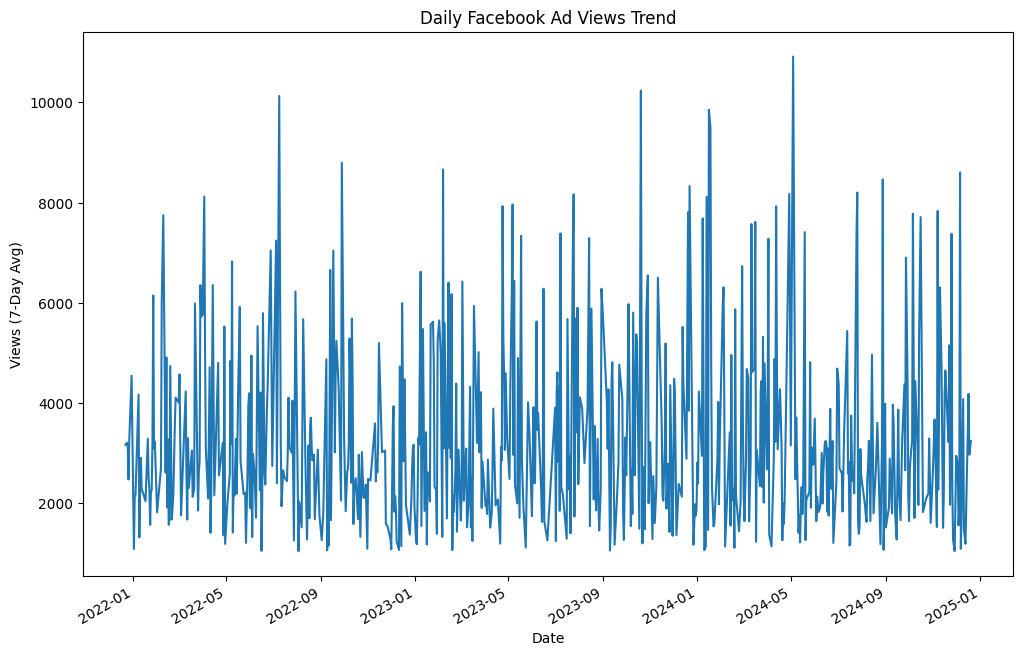

In [13]:
plt.figure(figsize=(12,8))
ab.groupby('date_of_campaign')['facebook_ad_views'].sum().plot(title="Daily Facebook Ad Views Trend")
plt.xlabel("Date")
plt.ylabel("Views (7-Day Avg)")
plt.show()

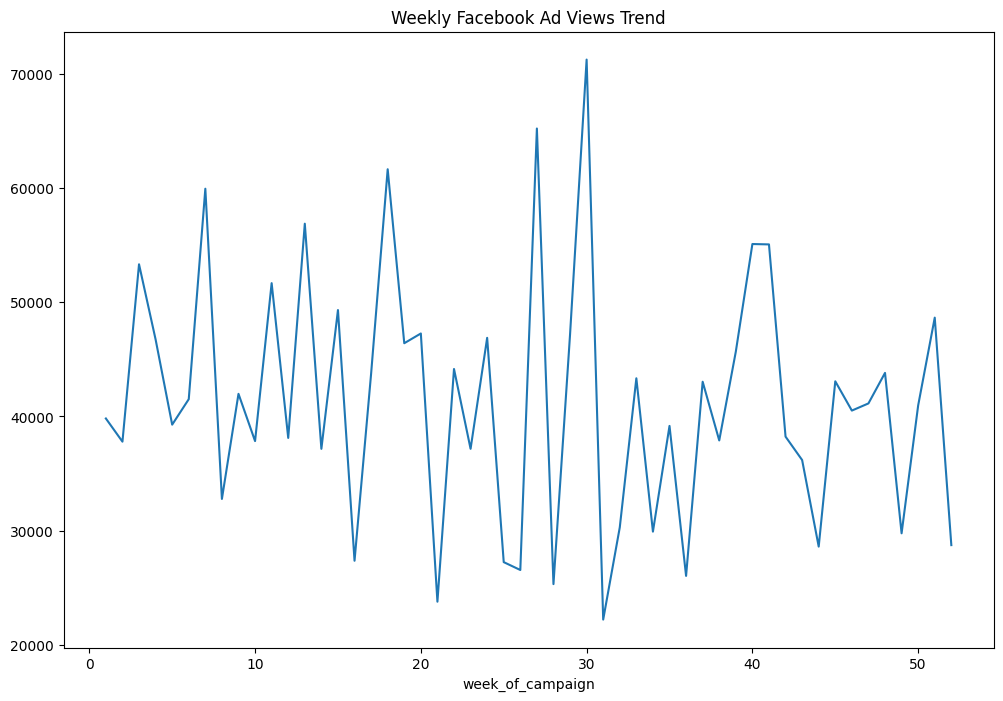

In [14]:
ab['week_of_campaign']=ab['date_of_campaign'].dt.isocalendar().week
plt.figure(figsize=(12,8))
ab.groupby('week_of_campaign')['facebook_ad_views'].sum().plot(title="Weekly Facebook Ad Views Trend")
plt.show()

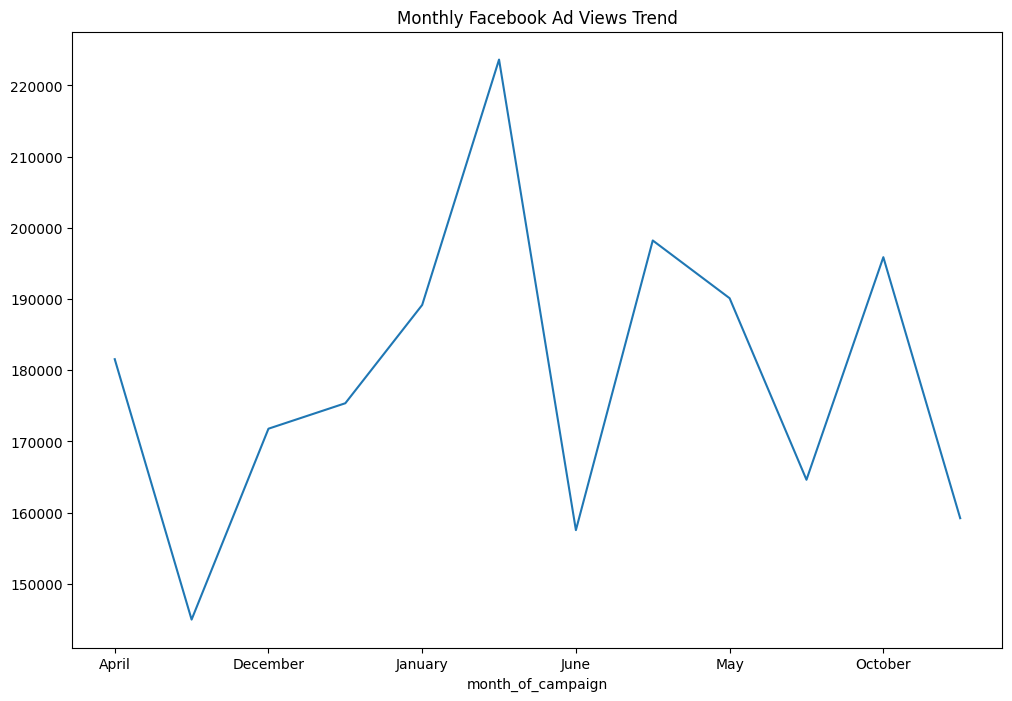

In [15]:

plt.figure(figsize=(12,8))
ab.groupby('month_of_campaign')['facebook_ad_views'].sum().plot(title="Monthly Facebook Ad Views Trend")
plt.show()

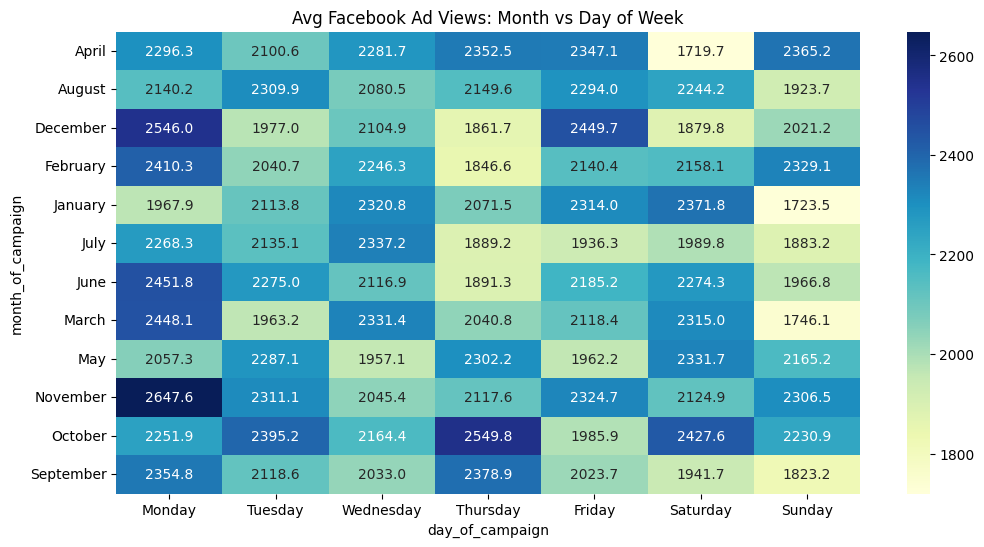

In [16]:
pivot_fb = ab.pivot_table(index='month_of_campaign', columns='day_of_campaign', values='facebook_ad_views', aggfunc='mean')
pivot_fb = pivot_fb[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]  # Order columns

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_fb, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Avg Facebook Ad Views: Month vs Day of Week")
plt.show()


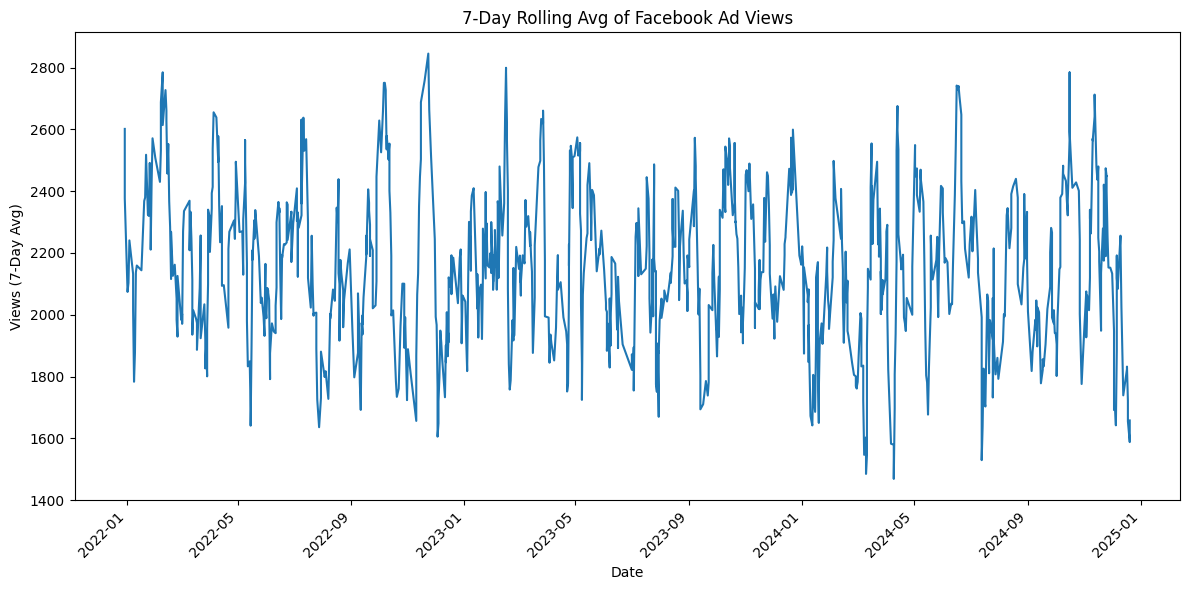

In [17]:
plt.figure(figsize=(12, 6))
ab.set_index('date_of_campaign')['facebook_ad_views'].rolling(window=7).mean().plot(title="7-Day Rolling Avg of Facebook Ad Views")
plt.xlabel("Date")
plt.ylabel("Views (7-Day Avg)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


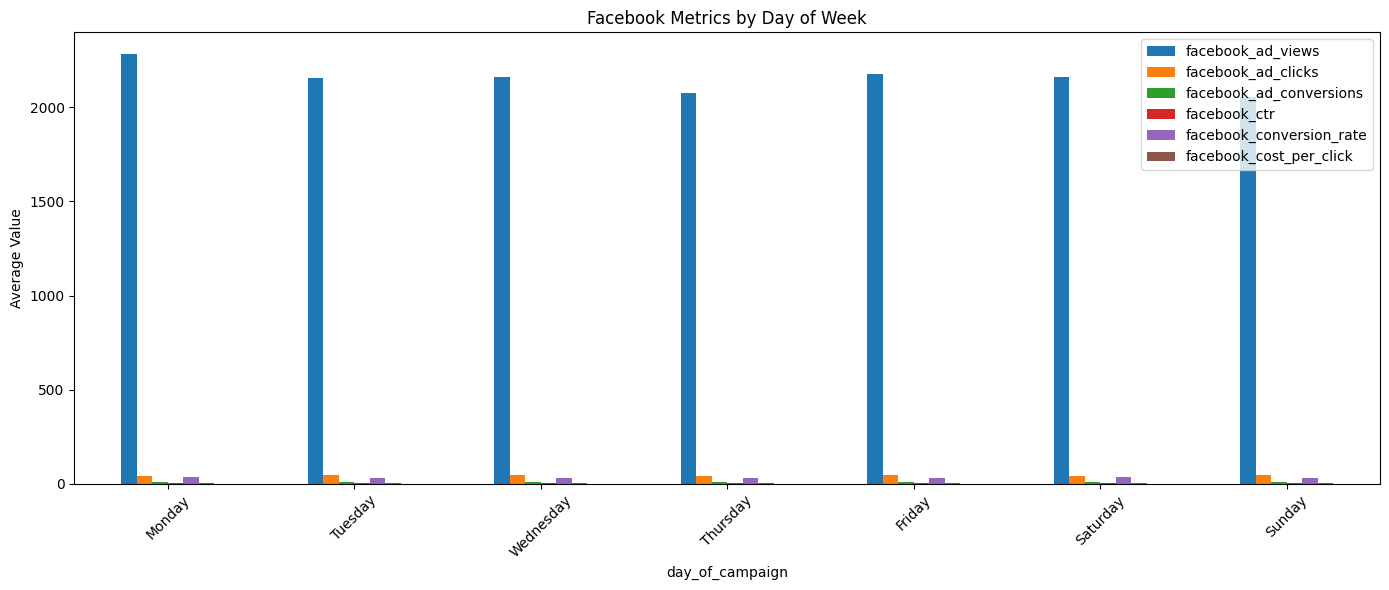

In [18]:
fb_by_day = ab.groupby('day_of_campaign')[['facebook_ad_views', 'facebook_ad_clicks',
                                       'facebook_ad_conversions', 'facebook_ctr',
                                       'facebook_conversion_rate', 'facebook_cost_per_click']].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

fb_by_day.plot(kind='bar', figsize=(14, 6), title="Facebook Metrics by Day of Week")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


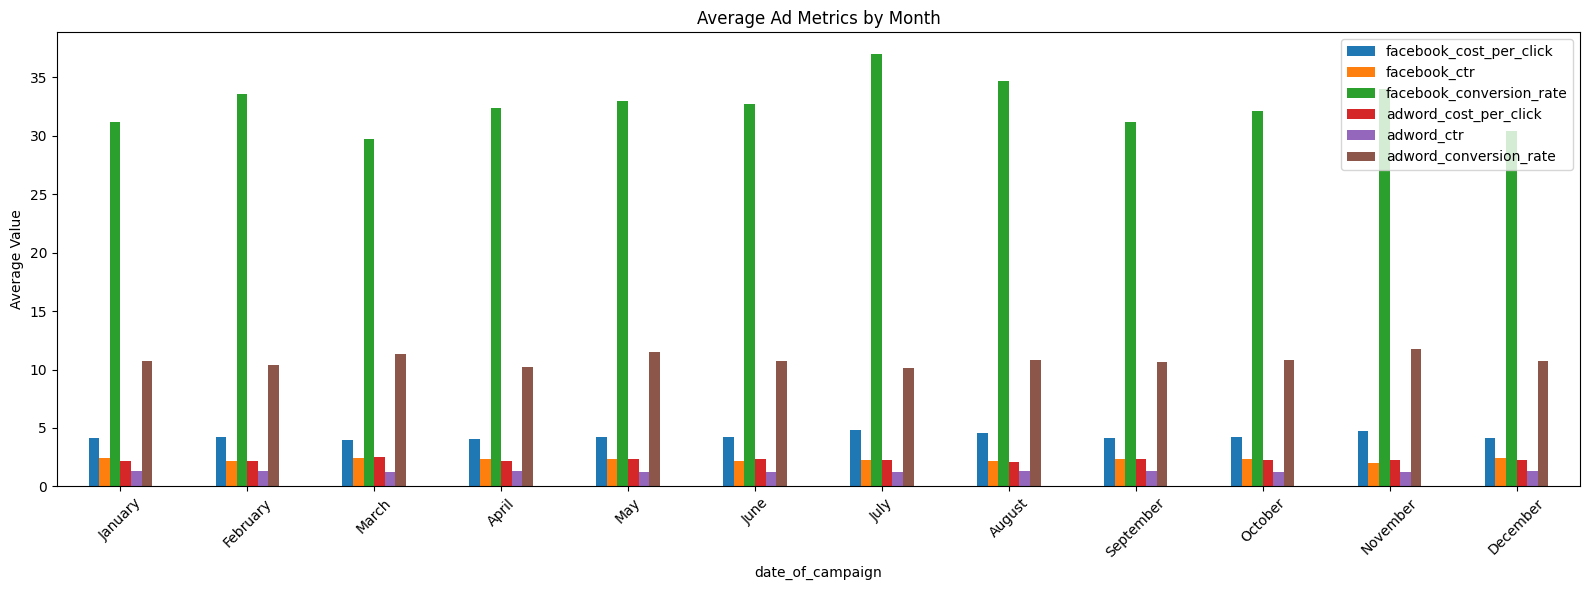

In [19]:
monthly_avg = ab.groupby(ab['date_of_campaign'].dt.month)[['facebook_cost_per_click', 'facebook_ctr', 'facebook_conversion_rate',
                                                            'adword_cost_per_click', 'adword_ctr', 'adword_conversion_rate']].mean()

monthly_avg.index = pd.to_datetime(monthly_avg.index, format='%m').month_name()

monthly_avg.plot(kind='bar', figsize=(16, 6), title="Average Ad Metrics by Month")
plt.xticks(rotation=45)
plt.ylabel("Average Value")
plt.tight_layout()
plt.show()


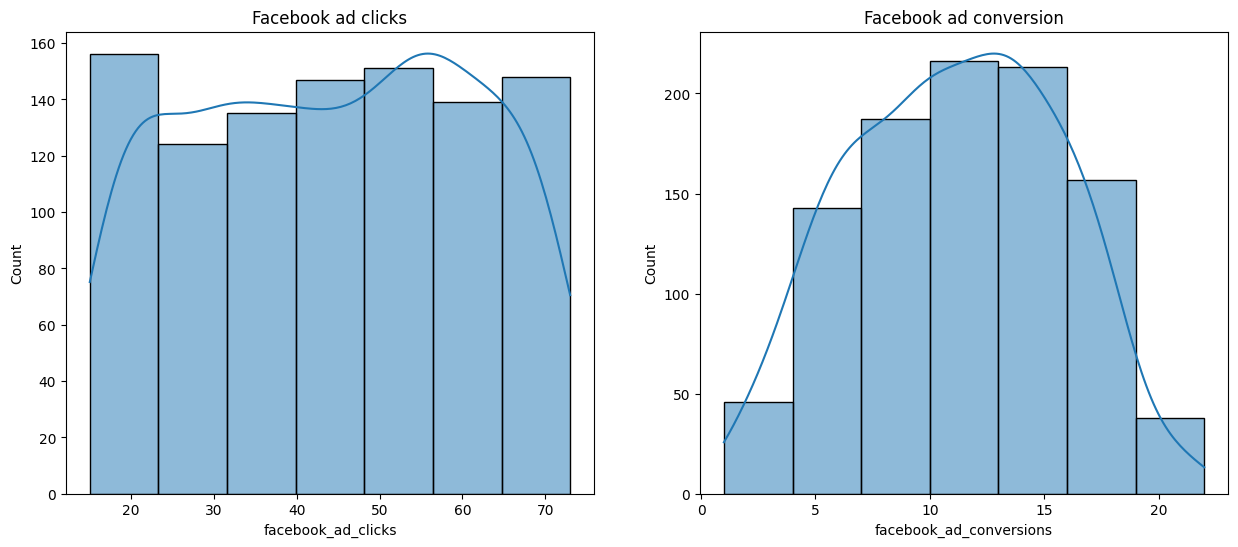

In [20]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Facebook ad clicks")
sns.histplot(ab["facebook_ad_clicks"],bins=7,kde=True)
plt.subplot(1,2,2)
plt.title("Facebook ad conversion")
sns.histplot(ab["facebook_ad_conversions"],bins=7,kde=True)
plt.savefig("fb_dist.jpeg")
plt.show()

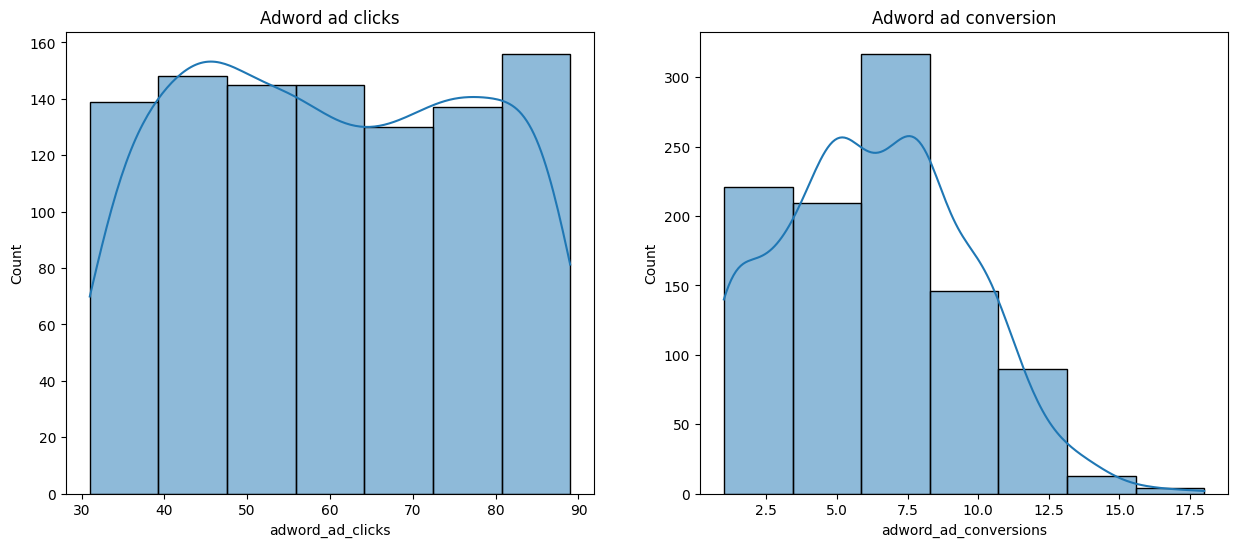

In [21]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Adword ad clicks")
sns.histplot(ab["adword_ad_clicks"],bins=7,kde=True)
plt.subplot(1,2,2)
plt.title("Adword ad conversion")
sns.histplot(ab["adword_ad_conversions"],bins=7,kde=True)
plt.savefig("AdWord.jpeg")
plt.show()

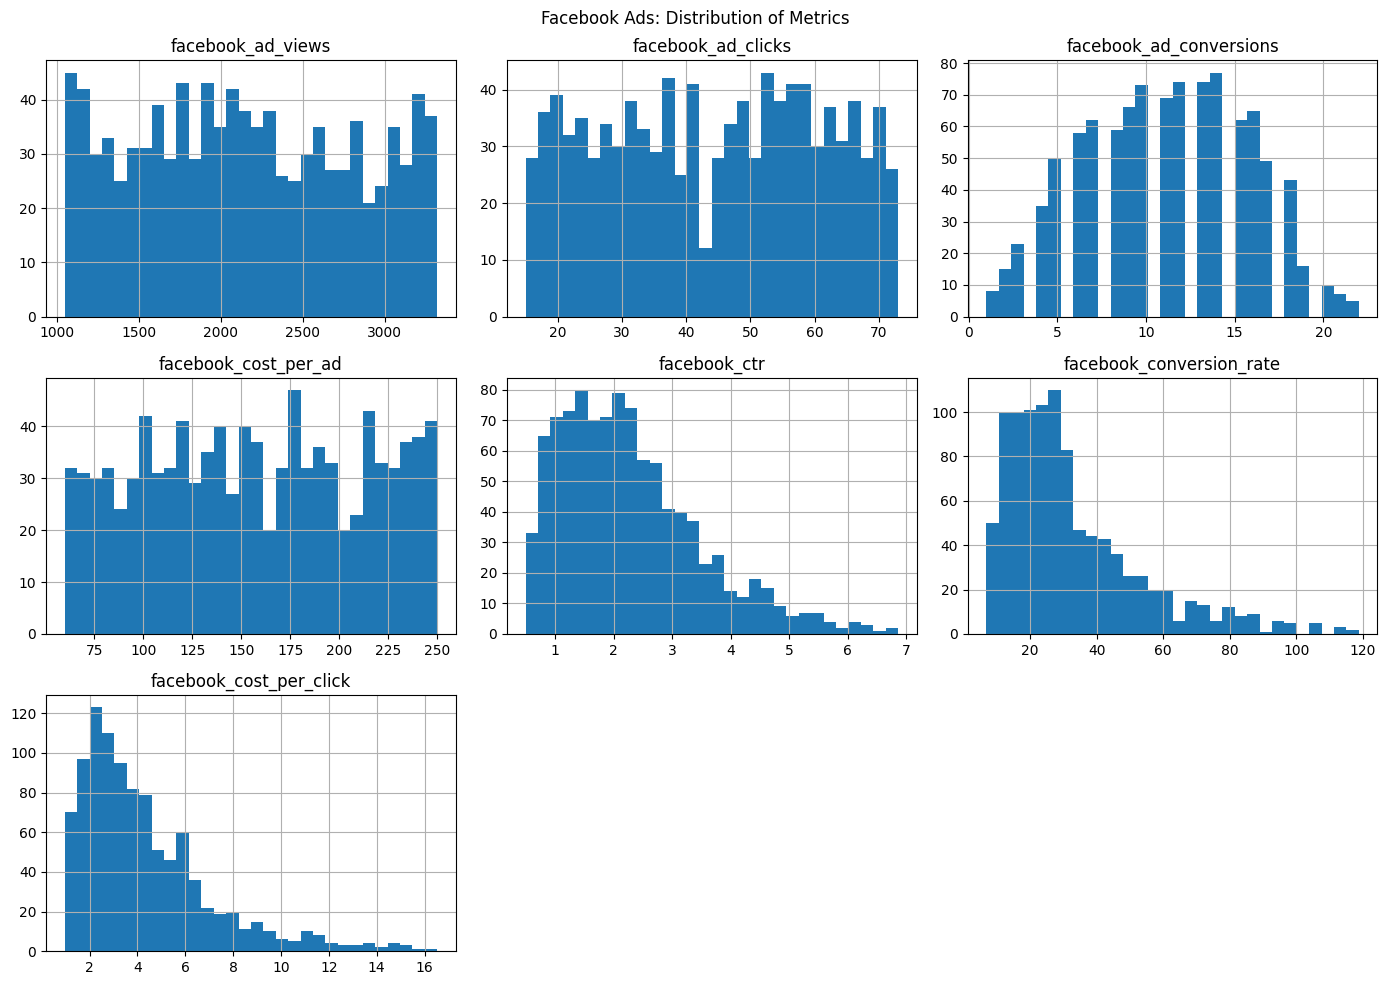

In [22]:
ab[['facebook_ad_views', 'facebook_ad_clicks', 'facebook_ad_conversions',
    'facebook_cost_per_ad', 'facebook_ctr', 'facebook_conversion_rate',
    'facebook_cost_per_click']].hist(figsize=(14,10), bins=30)
plt.suptitle("Facebook Ads: Distribution of Metrics")
plt.tight_layout()
plt.show()


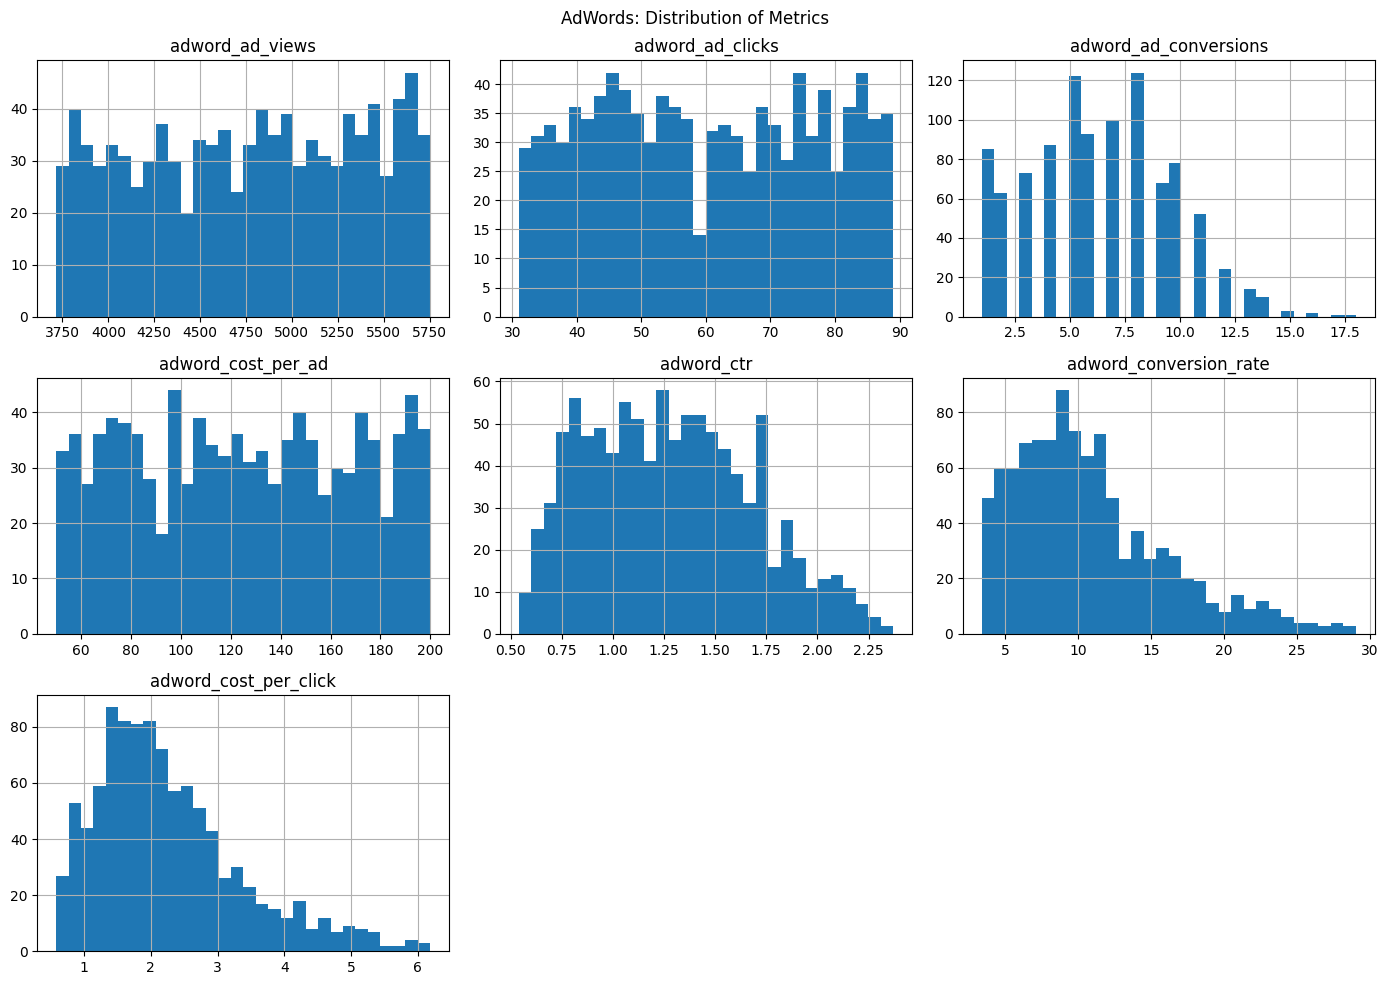

In [23]:
ab[['adword_ad_views', 'adword_ad_clicks', 'adword_ad_conversions',
    'adword_cost_per_ad', 'adword_ctr', 'adword_conversion_rate',
    'adword_cost_per_click']].hist(figsize=(14,10), bins=30)
plt.suptitle("AdWords: Distribution of Metrics")
plt.tight_layout()
plt.show()


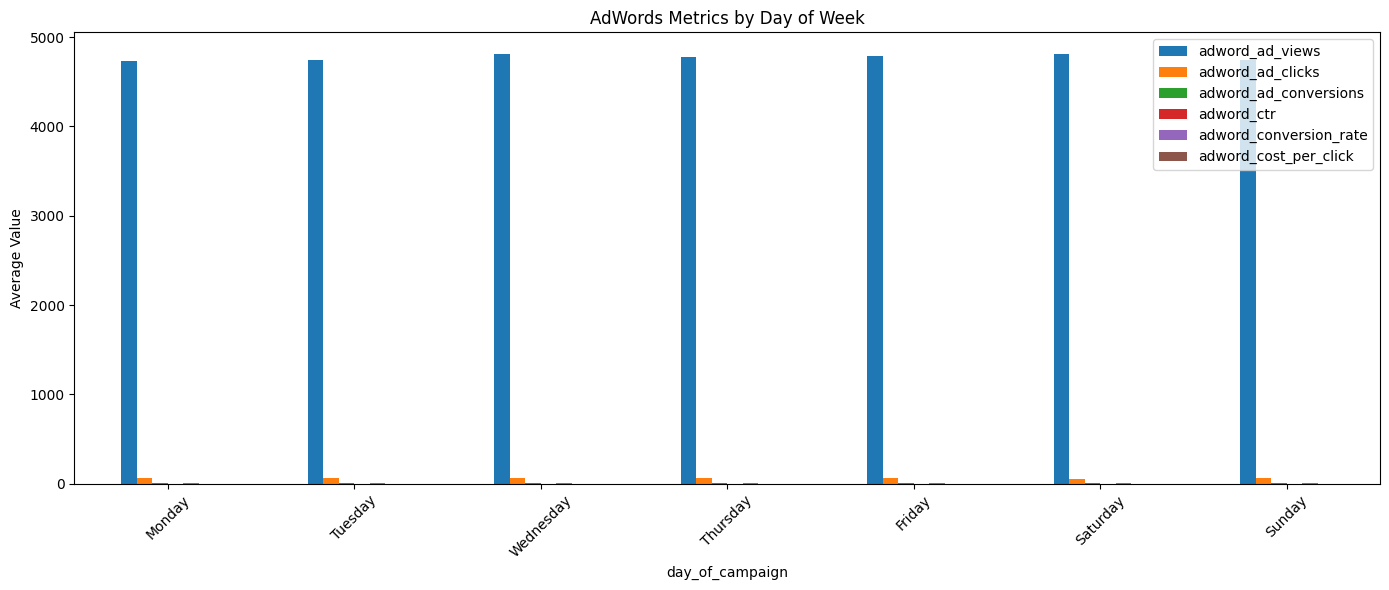

In [24]:
ad_by_day = ab.groupby('day_of_campaign')[['adword_ad_views', 'adword_ad_clicks',
                                       'adword_ad_conversions', 'adword_ctr',
                                       'adword_conversion_rate', 'adword_cost_per_click']].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

ad_by_day.plot(kind='bar', figsize=(14, 6), title="AdWords Metrics by Day of Week")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


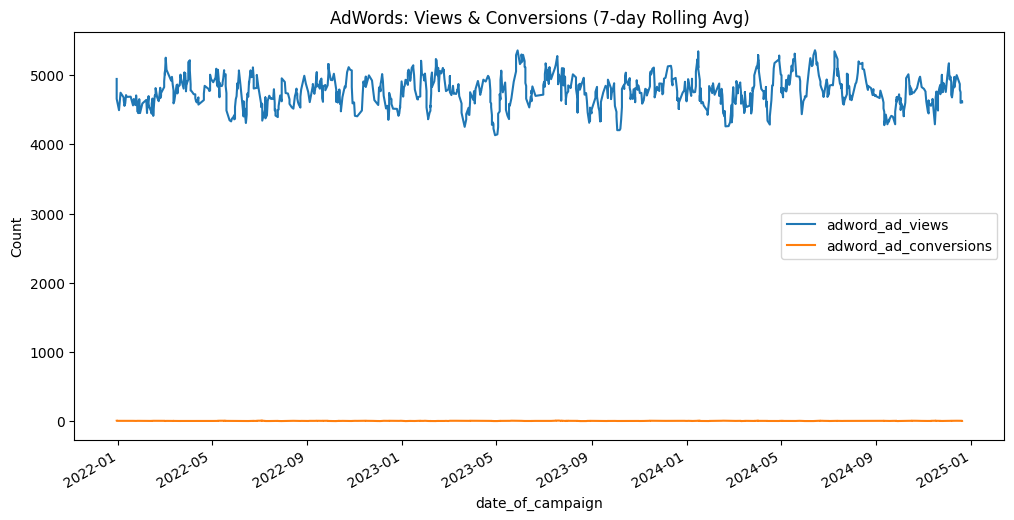

In [25]:
ab.set_index('date_of_campaign')[['adword_ad_views', 'adword_ad_conversions']].rolling(7).mean().plot(figsize=(12,6))
plt.title("AdWords: Views & Conversions (7-day Rolling Avg)")
plt.ylabel("Count")
plt.show()


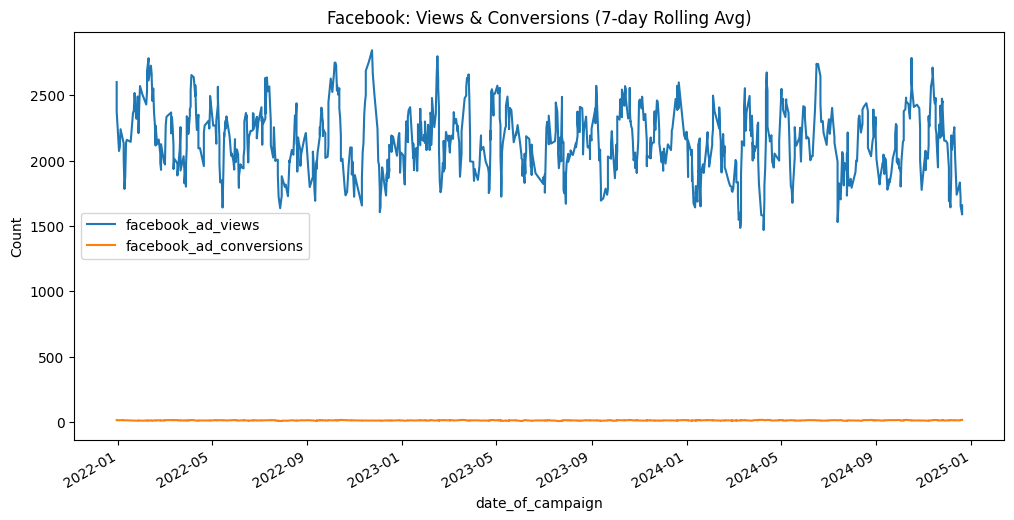

In [26]:
ab.set_index('date_of_campaign')[['facebook_ad_views', 'facebook_ad_conversions']].rolling(7).mean().plot(figsize=(12,6))
plt.title("Facebook: Views & Conversions (7-day Rolling Avg)")
plt.ylabel("Count")
plt.show()


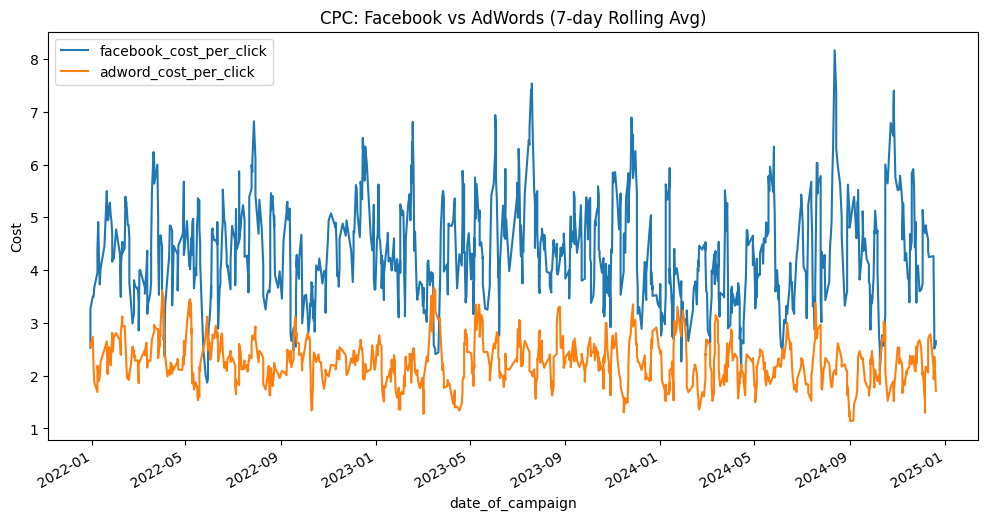

In [27]:
ab.set_index('date_of_campaign')[['facebook_cost_per_click', 'adword_cost_per_click']].rolling(7).mean().plot(figsize=(12,6))
plt.title("CPC: Facebook vs AdWords (7-day Rolling Avg)")
plt.ylabel("Cost")
plt.show()


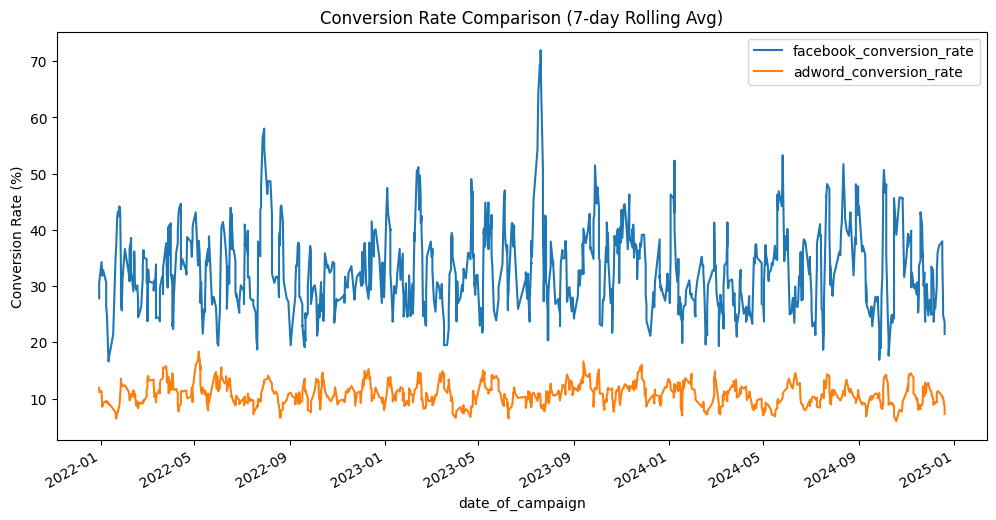

In [28]:
ab.set_index('date_of_campaign')[['facebook_conversion_rate', 'adword_conversion_rate']].rolling(7).mean().plot(figsize=(12,6))
plt.title("Conversion Rate Comparison (7-day Rolling Avg)")
plt.ylabel("Conversion Rate (%)")
plt.savefig("conversion_rate.jpeg")
plt.show()


In [29]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date_of_campaign          1000 non-null   datetime64[ns]
 1   facebook_ad_campaign      1000 non-null   object        
 2   facebook_ad_views         1000 non-null   int64         
 3   facebook_ad_clicks        1000 non-null   int64         
 4   facebook_ad_conversions   1000 non-null   int64         
 5   facebook_cost_per_ad      1000 non-null   int64         
 6   facebook_ctr              1000 non-null   float64       
 7   facebook_conversion_rate  1000 non-null   float64       
 8   facebook_cost_per_click   1000 non-null   float64       
 9   adword_ad_campaign        1000 non-null   object        
 10  adword_ad_views           1000 non-null   int64         
 11  adword_ad_clicks          1000 non-null   int64         
 12  adword_ad_conversions

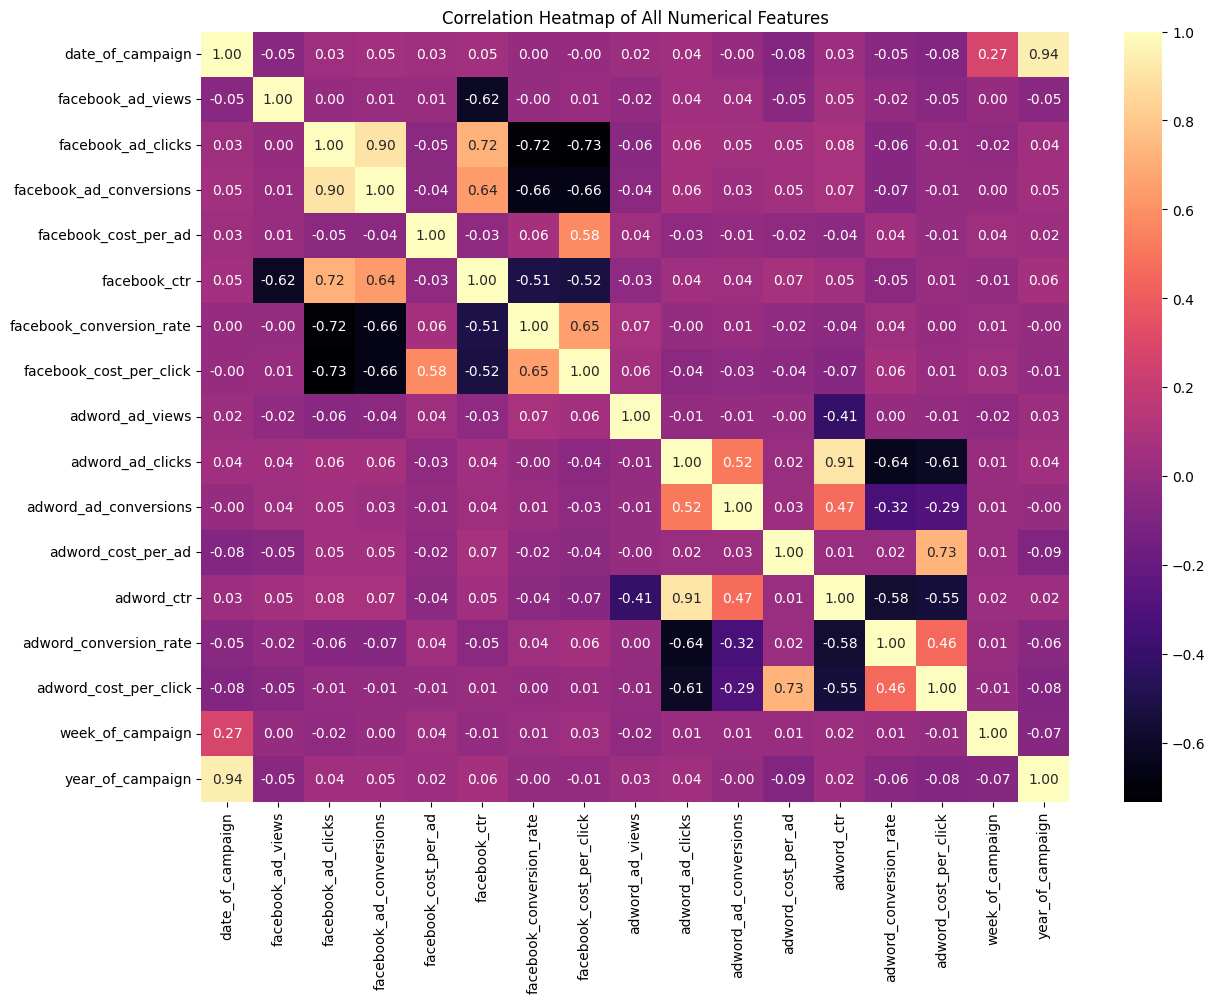

In [30]:

plt.figure(figsize=(14, 10))
sns.heatmap(ab.drop(columns=['facebook_ad_campaign', 'adword_ad_campaign', 'month_of_campaign','day_of_campaign']).corr(),fmt='.2f', annot=True, cmap='magma')
plt.title("Correlation Heatmap of All Numerical Features")
plt.savefig('heat.jpeg',bbox_inches='tight')
plt.show()


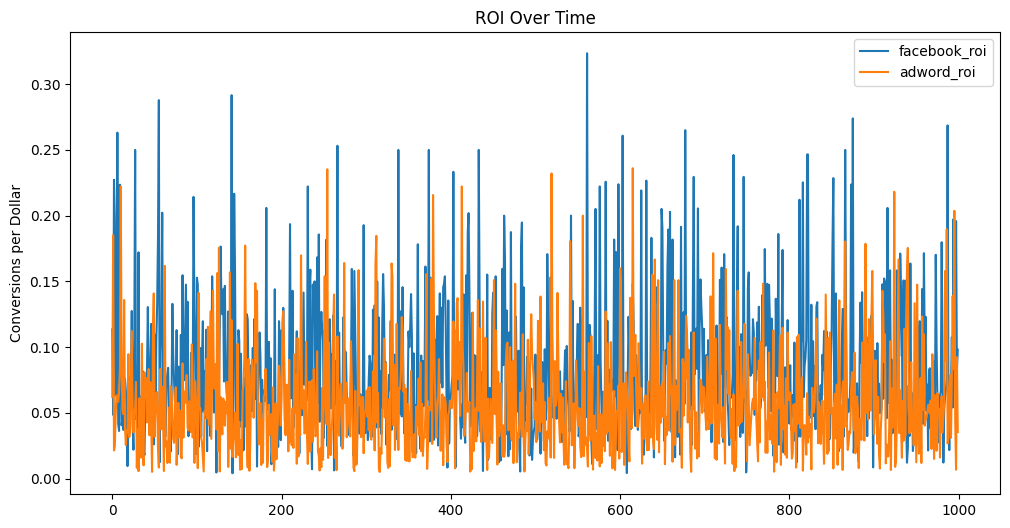

In [31]:
ab['facebook_total_engagement'] = ab['facebook_ad_clicks'] + ab['facebook_ad_conversions']
ab['adword_total_engagement'] = ab['adword_ad_clicks'] + ab['adword_ad_conversions']

ab['facebook_roi'] = ab['facebook_ad_conversions'] / ab['facebook_cost_per_ad']
ab['adword_roi'] = ab['adword_ad_conversions'] / ab['adword_cost_per_ad']

ab[['facebook_roi', 'adword_roi']].plot(figsize=(12, 6), title="ROI Over Time")
plt.ylabel("Conversions per Dollar")
plt.show()


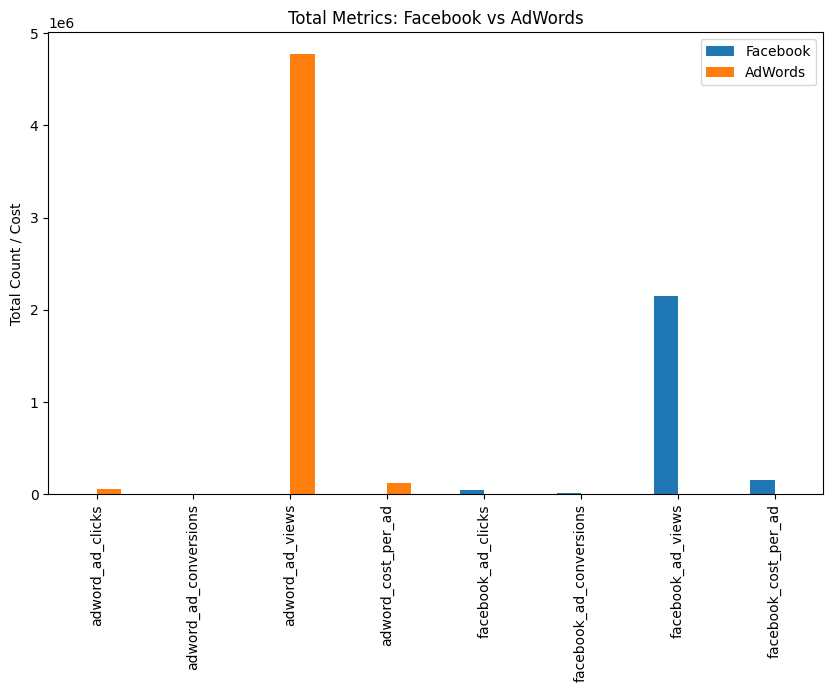

In [32]:
fb_summary = ab[['facebook_ad_views', 'facebook_ad_clicks', 'facebook_ad_conversions', 'facebook_cost_per_ad']].sum()
ad_summary = ab[['adword_ad_views', 'adword_ad_clicks', 'adword_ad_conversions', 'adword_cost_per_ad']].sum()

comparison_df = pd.DataFrame({'Facebook': fb_summary, 'AdWords': ad_summary})
comparison_df.plot(kind='bar', figsize=(10, 6), title="Total Metrics: Facebook vs AdWords")
plt.ylabel("Total Count / Cost")
plt.show()


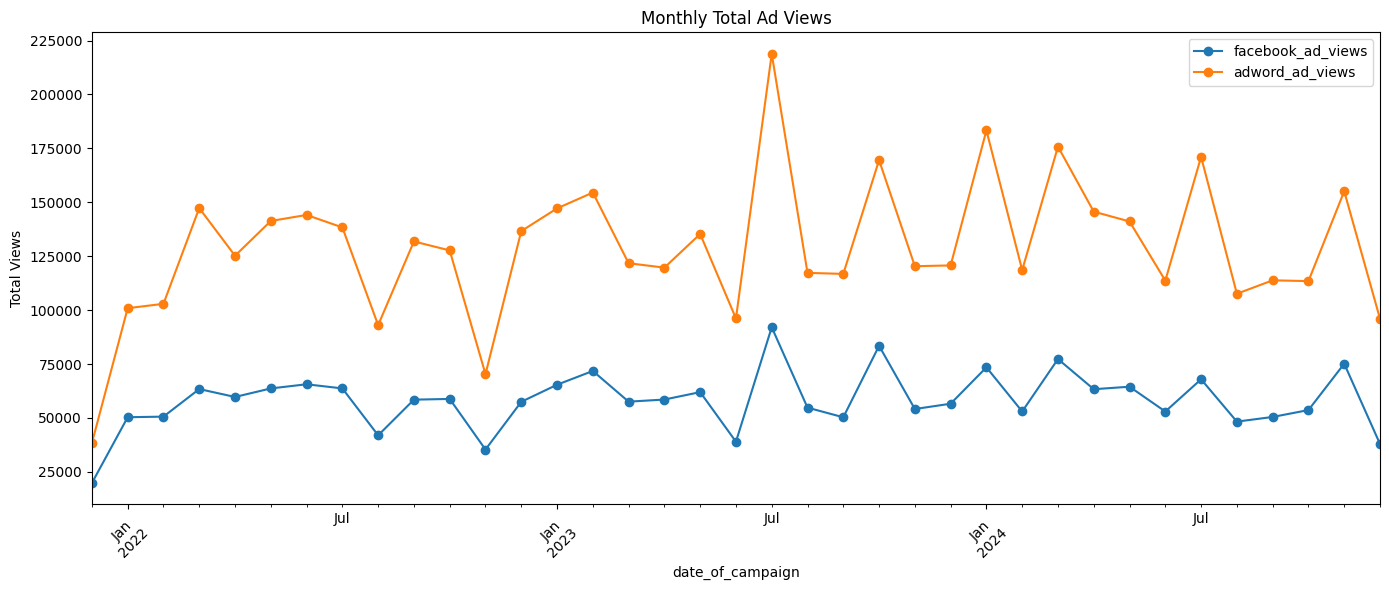

In [33]:
monthly_views = ab.groupby(ab['date_of_campaign'].dt.to_period('M'))[['facebook_ad_views', 'adword_ad_views']].sum()
monthly_views.index = monthly_views.index.to_timestamp()

monthly_views.plot(figsize=(14, 6), marker='o', title="Monthly Total Ad Views")
plt.ylabel("Total Views")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [34]:
def create_category(conversion_col):
    category=[]
    for conversion in conversion_col:
        if conversion<6:
            category.append("Less than 6")
        elif 6<=conversion<11:
            category.append("6-10")
        elif 11<=conversion<16:
            category.append("11-15")
        else:
            category.append("More than 15")
    return category

ab["facebook_ad_conversions_category"]=create_category(ab['facebook_ad_conversions'])

ab["adword_ad_conversions_category"]=create_category(ab['adword_ad_conversions'])

In [35]:
ab[['facebook_ad_conversions','facebook_ad_conversions_category','adword_ad_conversions','adword_ad_conversions_category']]

,facebook_ad_conversions,facebook_ad_conversions_category,adword_ad_conversions,adword_ad_conversions_category
0,16,More than 15,11,11-15
1,9,6-10,10,6-10
2,15,11-15,4,Less than 6
3,14,11-15,4,Less than 6
4,11,11-15,8,6-10
...,...,...,...,...
995,13,11-15,11,11-15
996,18,More than 15,5,Less than 6
997,19,More than 15,1,Less than 6
998,14,11-15,6,6-10


In [36]:
ab['facebook_ad_conversions_category'].value_counts()


facebook_ad_conversions_category
11-15           356
6-10            318
More than 15    195
Less than 6     131
Name: count, dtype: int64

In [37]:
ab['adword_ad_conversions_category'].value_counts()

adword_ad_conversions_category
6-10            463
Less than 6     430
11-15           103
More than 15      4
Name: count, dtype: int64

In [38]:

facebook=pd.DataFrame(ab['facebook_ad_conversions_category'].value_counts()).reset_index().rename(columns={'facebook_ad_conversions_category':'category'})
facebook

,category,count
0,11-15,356
1,6-10,318
2,More than 15,195
3,Less than 6,131


In [39]:
adword=pd.DataFrame(ab['adword_ad_conversions_category'].value_counts()).reset_index().rename(columns={'adword_ad_conversions_category':'category'})
adword

,category,count
0,6-10,463
1,Less than 6,430
2,11-15,103
3,More than 15,4


In [40]:
# merge and fill missing values
category_df=pd.merge(facebook,adword,on='category',how='outer').fillna(0)
category_df

,category,count_x,count_y
0,11-15,356,103
1,6-10,318,463
2,Less than 6,131,430
3,More than 15,195,4


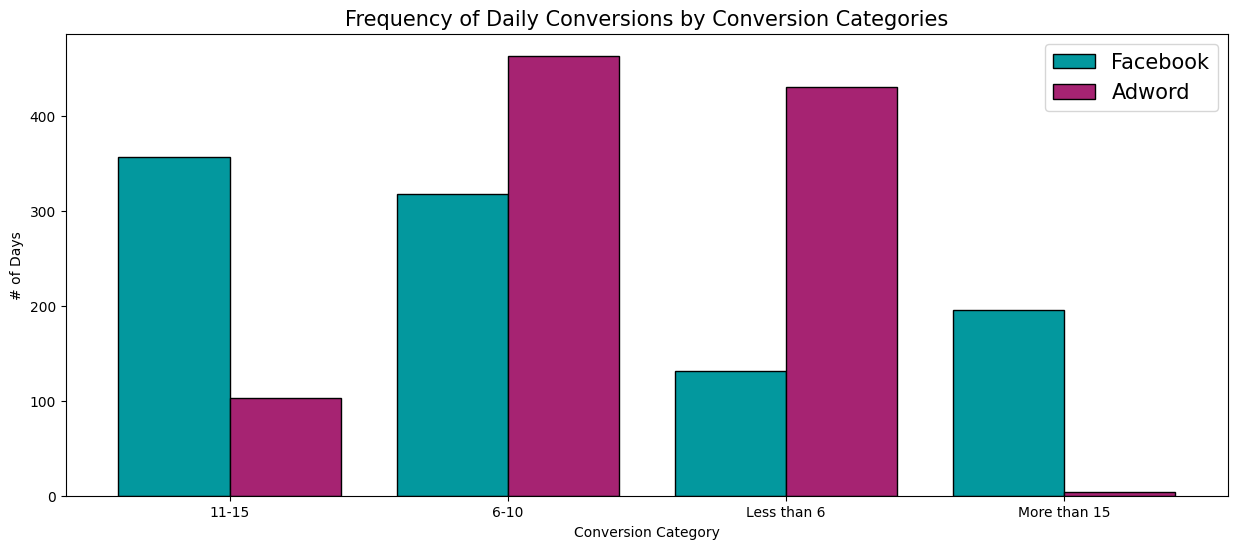

In [41]:
X_axis=np.arange(len(category_df))
plt.figure(figsize=(15,6))
plt.bar(X_axis-0.2,category_df['count_x'],0.4,label='Facebook',color='#03989E',linewidth=1,edgecolor='k')
plt.bar(X_axis+0.2,category_df['count_y'],0.4,label='Adword',color='#A62372',linewidth=1,edgecolor='k')

plt.xticks(X_axis,category_df['category'])
plt.xlabel("Conversion Category")
plt.ylabel("# of Days")
plt.title("Frequency of Daily Conversions by Conversion Categories",fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [42]:
 # Do more clicks on the ad really lead to sales?

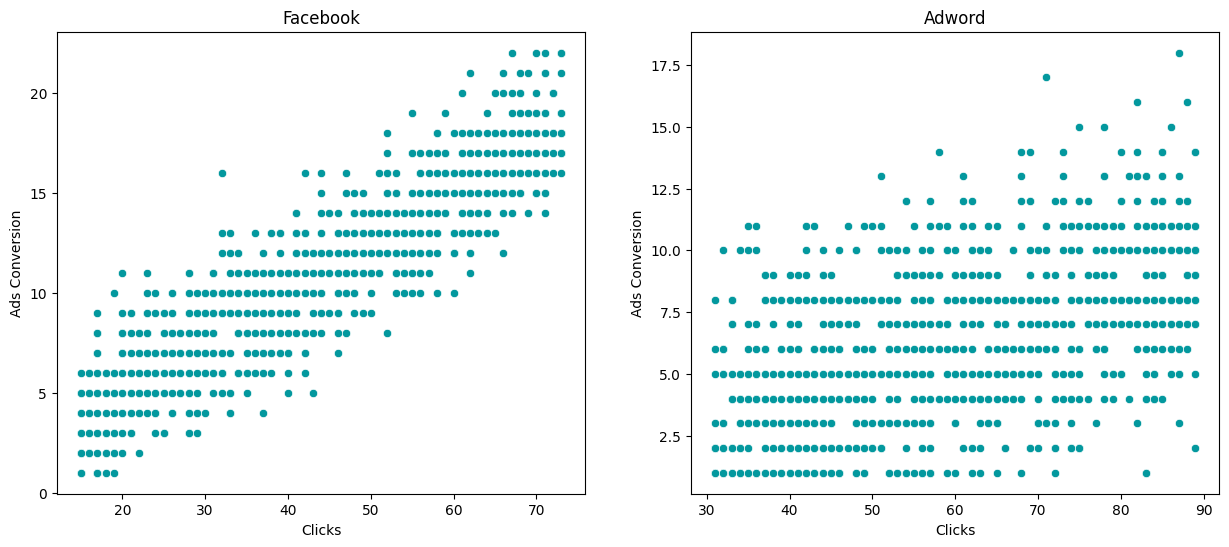

In [43]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Facebook")
sns.scatterplot(x=ab['facebook_ad_clicks'],y=ab['facebook_ad_conversions'], color='#03989E')
plt.xlabel("Clicks")
plt.ylabel("Ads Conversion")

plt.subplot(1,2,2)
plt.title("Adword")
sns.scatterplot(x=ab['adword_ad_clicks'],y=ab['adword_ad_conversions'], color='#03989E')
plt.xlabel("Clicks")
plt.ylabel("Ads Conversion")
plt.show()

In [44]:
f_corr=ab[['facebook_ad_clicks','facebook_ad_conversions']].corr()

In [45]:
f_corr

,facebook_ad_clicks,facebook_ad_conversions
facebook_ad_clicks,1.00000,0.90291
facebook_ad_conversions,0.90291,1.00000


In [46]:
a_corr=ab[['adword_ad_clicks','adword_ad_conversions']].corr()

In [47]:
a_corr

,adword_ad_clicks,adword_ad_conversions
adword_ad_clicks,1.000000,0.516198
adword_ad_conversions,0.516198,1.000000


# Hypothesis Testing

Hypothesis: Advertising on Facebook will result in a greater number of conversions compared to advertising on AdWords

Null Hypothesis (H0): There is no difference in the number of conversions between Facebook and AdWords 

Alternate Hypothesis(H1): The no. of conversions from Facebook is greater than the no. of conversions from AdWord

In [48]:
print(f"Facebook Ad Conversion Mean: {round(ab['facebook_ad_conversions'].mean(),2)}\n")

Facebook Ad Conversion Mean: 11.1



In [49]:
print(f"AdWord Ad Conversion Mean: {round(ab['adword_ad_conversions'].mean(),2)}\n")

AdWord Ad Conversion Mean: 6.32



In [51]:

t_stats, p_value = stats.ttest_ind(a=ab['facebook_ad_conversions'], b=ab['adword_ad_conversions'], equal_var=False)

In [52]:
print(f"T Statistic: {t_stats}\nP-Value: {p_value}")

T Statistic: 26.76865250224025
P-Value: 2.7038481866116846e-133


In [53]:
if p_value<0.05:
    print("p-value is less than significance value, Reject the null hypothesis")
else:
    print("p-value is greater than significance value, Accept the null hypothesis")

p-value is less than significance value, Reject the null hypothesis


In [54]:
ab.shape

(1000, 27)

In [55]:
import numpy as np

# Extract samples
fb = ab['facebook_ad_conversions']
ad = ab['adword_ad_conversions']

# Sample sizes
n1, n2 = len(fb), len(ad)

# Sample variances
s1_sq = np.var(fb, ddof=1)
s2_sq = np.var(ad, ddof=1)

# Welch–Satterthwaite equation
numerator = (s1_sq/n1 + s2_sq/n2)**2
denominator = ((s1_sq/n1)**2)/(n1-1) + ((s2_sq/n2)**2)/(n2-1)
df_welch = numerator / denominator

print(f"Welch's Degrees of Freedom: {df_welch:.2f}")


Welch's Degrees of Freedom: 1812.19


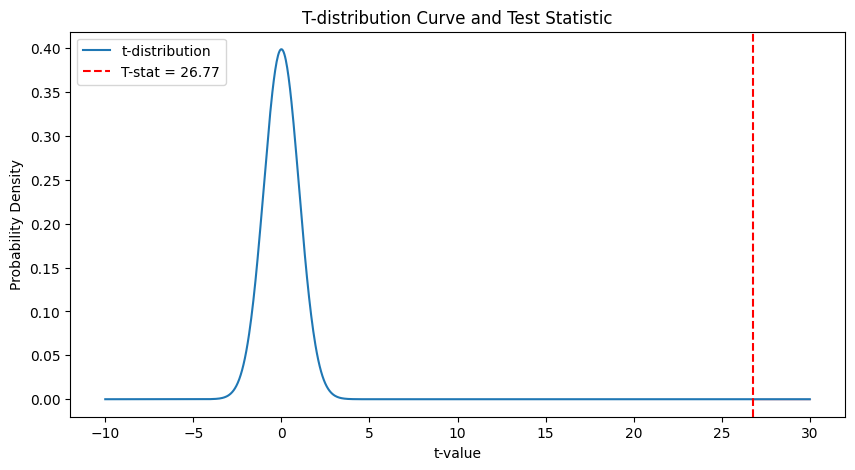

In [56]:

df = 1812.19 
x = np.linspace(-10, 30, 1000)
y = stats.t.pdf(x, df=df)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label='t-distribution')
plt.axvline(x=t_stats, color='red', linestyle='--', label=f'T-stat = {round(t_stats, 2)}')
plt.fill_between(x, y, where=(x > t_stats), color='red', alpha=0.3)
plt.title('T-distribution Curve and Test Statistic')
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(False)
plt.savefig("t.jpeg")
plt.show()


In [58]:
t_stats, p_value_two_tailed = stats.ttest_ind(a=ab['facebook_ad_conversions'], 
                                            b=ab['adword_ad_conversions'], 
                                            equal_var=False)


if t_stats > 0:
    p_value_one_tailed = p_value_two_tailed / 2
else:
    p_value_one_tailed = 1 - (p_value_two_tailed / 2)

print(f"T-statistic: {t_stats:.4f}")
print(f"One-tailed P-value: {p_value_one_tailed:.4e}")


T-statistic: 26.7687
One-tailed P-value: 1.3519e-133


# Regression Analysis

what will happen when i go with facebook ad? how many facebook ad conversion can i expect given a certain number of facebook ad clicks?

In [ ]:
# independent variable
X= ab[['facebook_ad_clicks']]
# dependent variable
y= ab[['facebook_ad_conversions']]

In [ ]:
lr_model=LinearRegression()
lr_model.fit(X,y)
pred_lr=lr_model.predict(X)

In [ ]:
r2= r2_score(y,pred_lr)*100
mse=mean_squared_error(y,pred_lr)
print("Accuracy R2 Score: ",round(r2,2),'%')
print("Mean Square Error: ",round(mse,2))

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=ab['facebook_ad_clicks'],y=ab['facebook_ad_conversions'],color='#a134eb',label='Actual data points')
plt.plot(ab['facebook_ad_clicks'],pred_lr,color='#eb3434',label='Best fit line (y=ax+b)')
plt.legend()
plt.savefig("best_fit.jpeg")
plt.show()

In [ ]:
lr_model.predict([[80]])[0][0]

In [ ]:
lr_model.predict([[50]])[0][0]